In [14]:
import tensorflow as tf
import numpy as np

In [15]:
# Generating Two Classes

num_samples_per_class= 1000

negative_samples= np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples= np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

inputs= np.vstack((negative_samples,
    positive_samples)).astype(np.float32)

In [16]:
# Generating Targets

targets= np.vstack((
    np.zeros((
        num_samples_per_class, 1),
        dtype="float32"),
    np.ones(
        (num_samples_per_class, 1),
        dtype="float32")))

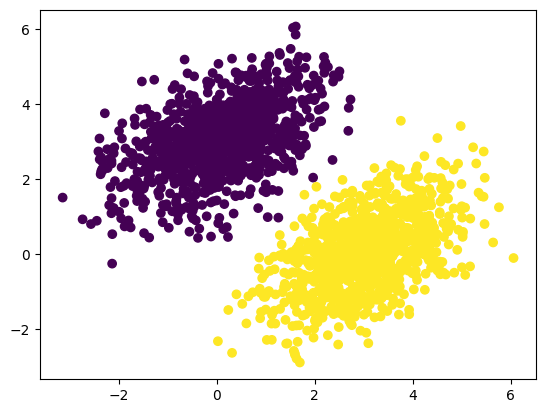

In [17]:
# Plot The Data

import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [18]:
# Linear Classifier

input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(
    shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(
    shape=(output_dim,)))

In [19]:
# The Forward Pass Function

def model(inputs):
    return tf.matmul(inputs, W) + b

In [20]:
# The Loss Function

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)

In [21]:
# The Training Step

learning_rate= 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions= model(inputs)
        loss= square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b= tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W* learning_rate)
    b.assign_sub(grad_loss_wrt_b* learning_rate)
    return loss

In [22]:
# The Batch Training Loop

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.2866
Loss at step 1: 0.6007
Loss at step 2: 0.2004
Loss at step 3: 0.1325
Loss at step 4: 0.1155
Loss at step 5: 0.1067
Loss at step 6: 0.0996
Loss at step 7: 0.0934
Loss at step 8: 0.0876
Loss at step 9: 0.0824
Loss at step 10: 0.0776
Loss at step 11: 0.0731
Loss at step 12: 0.0691
Loss at step 13: 0.0654
Loss at step 14: 0.0620
Loss at step 15: 0.0588
Loss at step 16: 0.0560
Loss at step 17: 0.0534
Loss at step 18: 0.0510
Loss at step 19: 0.0487
Loss at step 20: 0.0467
Loss at step 21: 0.0449
Loss at step 22: 0.0432
Loss at step 23: 0.0416
Loss at step 24: 0.0402
Loss at step 25: 0.0389
Loss at step 26: 0.0377
Loss at step 27: 0.0366
Loss at step 28: 0.0356
Loss at step 29: 0.0346
Loss at step 30: 0.0338
Loss at step 31: 0.0330
Loss at step 32: 0.0323
Loss at step 33: 0.0316
Loss at step 34: 0.0311
Loss at step 35: 0.0305
Loss at step 36: 0.0300
Loss at step 37: 0.0295
Loss at step 38: 0.0291
Loss at step 39: 0.0287


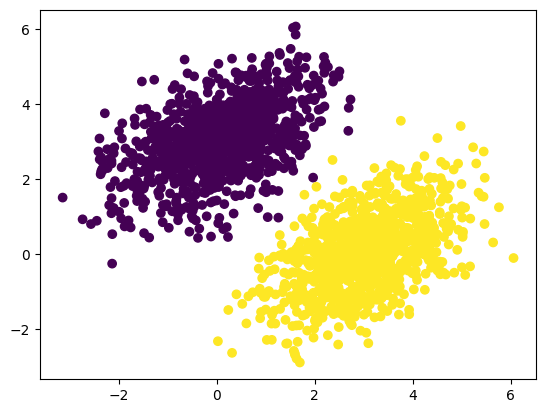

In [23]:
# The Training Result

predictions= model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

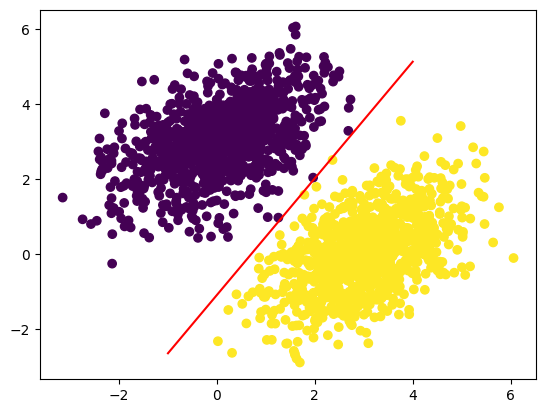

In [24]:
# Creating Visualized Model

x= np.linspace(-1, 4, 100)
y= -W[0] / W[1] * x+ (0.5-b) / W[1]

plt.plot(x, y, "-r")
plt.scatter(
    inputs[:, 0],
    inputs[:, 1],
    c = predictions[:, 0] > 0.5)